### Cross Validation

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Normalizer


#### Reading our data
For this lab, we will be using the car sales dataset, hosted on IBM Cloud object storage. The dataset contains all the information about cars, the name of the manufacturer, the year it was launched, all car technical parameters, and the sale price. This dataset has already been pre-cleaned and encoded (using one-hot and label encoders) in the Linear Regression Notebook.

Let's read the data into pandas data frame and look at the first 5 rows using the head() method.

We apply dtypes.value_counts() to see what types of data we have.

In [3]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/encoded_car_data.csv"
 

 
# Import pandas library
import pandas as pd
 
# Read the online file by the URL provides above, and assign it to variable "df"
data = pd.read_csv(path)
 
data.head(5)

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,price
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,13495.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,16500.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,94.5,2823.0,152.0,2.68,154.0,171.2,65.5,19.0,26.0,16500.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,99.8,2337.0,109.0,3.19,102.0,176.6,66.2,24.0,30.0,13950.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,99.4,2824.0,136.0,3.19,115.0,176.6,66.4,18.0,22.0,17450.0


In [4]:
data.dtypes.value_counts()

float64    36
Name: count, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diesel       205 non-null    float64
 1   gas          205 non-null    float64
 2   std          205 non-null    float64
 3   turbo        205 non-null    float64
 4   convertible  205 non-null    float64
 5   hardtop      205 non-null    float64
 6   hatchback    205 non-null    float64
 7   sedan        205 non-null    float64
 8   wagon        205 non-null    float64
 9   4wd          205 non-null    float64
 10  fwd          205 non-null    float64
 11  rwd          205 non-null    float64
 12  dohc         205 non-null    float64
 13  dohcv        205 non-null    float64
 14  l            205 non-null    float64
 15  ohc          205 non-null    float64
 16  ohcf         205 non-null    float64
 17  ohcv         205 non-null    float64
 18  rotor        205 non-null    float64
 19  eight   

#### Data Preparation
Let's first split our data into X features and y target.

In [6]:
X = data.drop(columns=['price'])
y = data['price'].copy()

#### Train Test Split
Now, we split our data into training and testing sets. Training data is used for our model to recognize patterns using some criteria, the test data is used for model evaluation, as shown in the image below.


source scikit-learn.org
We use the function train_test_split that splits arrays or matrices into random train and test subsets. The parameters of the train_test_split are:

X,y: the allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas data frames.

test_size: If float, it should be between 0.0 and 1.0 and represents the proportion of the dataset to include in the test split. If int (integer), it represents the absolute number of test samples. If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.

In our example, we will use 30% of the data for testing and 70% for training.

random_state: Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls. in our case, we set it to "42".



In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

#### Model Building and Evaluation
Let's perform linear regression using traditional train_test_split, which will split the data into train and test set, so that each target value appears in both training and testing sets. We will start by creating a LinearRegression() object, lr.

In [8]:
lr = LinearRegression()

In [9]:
lr.fit(X_train,y_train)

LinearRegression()

We apply the LinearRegression() model, m, and fit() our X_train and  y_train training data.

To make our predictions, we need to use our test data set. We apply predict() function on the testing data set.

In [10]:
predicted =lr.predict(X_test)

Now, let's check some evaluation statistics, such as the coefficient of determination, 
, using the built-in method score or r2_score, and the Root Mean Square Error, RMSE, for which we can use the mean_squared_error method, MSE.

The 
 statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively.

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

For more information on R-squared and RMSE, please visit their corresponding documentations.

In [11]:
lr.score(X_train,y_train)

0.9262649047364463

Using the training data only, the R2
 is ~ 0.93. So, almost 93% of variability in the training data is explained by our model.

Using the test data R2 we get ~0.85, not as good as the previous score.

In [12]:
lr.score(X_test,y_test)

0.8470389329624963

We can also use r2_score() method to calculate the 
R2 It will provide the same result.



In [13]:
print(r2_score(y_true=y_test, y_pred=predicted))

0.8470389329624963


ow, let's calculate the RMSE. The smaller the RMSE number the better our model is. We apply mean_squared_error to our y_testand our predicted data. Then, we take a square root of our MSE, using np.sqrt() function.

In [14]:
mse = mean_squared_error(y_true=y_test, y_pred=predicted)
rmse = np.sqrt(mse)
rmse

3255.42815638917

#### Prediction Example
Let's select some random data, using iloc and see some predicted versus actual values for the car prices.

In [15]:
some_data = X.iloc[:3]
some_labels = y.iloc[:3]

In [16]:
print("Predictions:", lr.predict(some_data))

Predictions: [13097.90625 13097.90625 15085.9375 ]


In [17]:
print("Labels:", list(some_labels))

Labels: [13495.0, 16500.0, 16500.0]


In [18]:
predicted =lr.predict(X_test)
predicted

array([27658.96875, 21446.46875, 10750.0625 , 12161.34375, 26154.6875 ,
        5414.375  ,  8093.9375 ,  7528.1875 , 10129.5    ,  9440.96875,
       17333.03125,  7245.46875, 16456.71875, 10829.9375 , 39761.84375,
        5530.5625 ,  2373.15625, 15741.     , 10776.5625 , 11467.65625,
       10836.1875 , 15802.     , 10482.875  ,  3590.625  ,  6979.125  ,
       28661.40625, 18345.5625 , 15197.71875,  4422.125  , 16401.09375,
       26803.65625,  5805.21875,  4857.125  , 16641.90625,  8386.1875 ,
       30422.875  , 12370.5    , 12964.34375,  6265.34375, 16179.46875,
        8162.4375 , 15094.3125 , 14734.625  ,  5234.71875,  6220.28125,
        9126.0625 ,  5805.21875,  7265.34375, 16696.875  , 15597.4375 ,
        5027.65625, 21867.71875,  7064.375  , 11428.5    ,  4358.34375,
       16499.46875, 18365.1875 , 12964.34375, 29682.75   ,  5428.15625,
        9818.65625, 17016.40625])

We can also use the pipeline to run operations on our data. For example we can standardize our data then perform linear regression by applying the method fit.

In [19]:
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])
pipe.fit(X_train,y_train)
pipe

Pipeline(steps=[('ss', StandardScaler()), ('lr', LinearRegression())])

In [20]:
pipe.score(X_train,y_train)

0.9252100825954781

Using the training data only, the R squared is ~ 0.93.
Now, let's check the R squared on the test set.

In [21]:
pipe.score(X_test,y_test)

-6.03498866940806e+22

The R squared is much lower. This value provides more accurate evaluation of our model since we test our model on the 'unseen' data set. In case if the R squared is negative, it is because the model is too complex and the data is overfitting. For more information, please, visit this documentation on overfitting.

This will make more sense when we explore polynomial regression.

#### Exercise 1
Create a pipeline object called pipe1, replace standardization with normalization. Calculate the 
 using the built-in method score and for RMSE, using mean_squared_error method.

In [22]:
pipe_1 = Pipeline([('nn',Normalizer() ),('lr', LinearRegression())])
pipe_1.fit(X_train, y_train)


pipe_1.score(X_train,y_train)
pipe_1.score(X_test,y_test)


pred =pipe_1.predict(X_test)


mse = mean_squared_error(y_true=y_test, y_pred=pred)
rmse = np.sqrt(mse)
rmse



93191039081089.92

Note, you can also use normalize by setting the LinearRegression(normalize=True)

In [23]:
features=list(X)
features

['diesel',
 'gas',
 'std',
 'turbo',
 'convertible',
 'hardtop',
 'hatchback',
 'sedan',
 'wagon',
 '4wd',
 'fwd',
 'rwd',
 'dohc',
 'dohcv',
 'l',
 'ohc',
 'ohcf',
 'ohcv',
 'rotor',
 'eight',
 'five',
 'four',
 'six',
 'three',
 'twelve',
 'two',
 'wheelbase',
 'curbweight',
 'enginesize',
 'boreratio',
 'horsepower',
 'carlength',
 'carwidth',
 'citympg',
 'highwaympg']

We can train a linear regression model using each feature and use the test data to obtain the best feature.

In [24]:
R_2=[]
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])

for feature in features:
    pipe.fit(X_train[[feature]],y_train)
    R_2.append(pipe.score(X_train[[feature]],y_train))
    

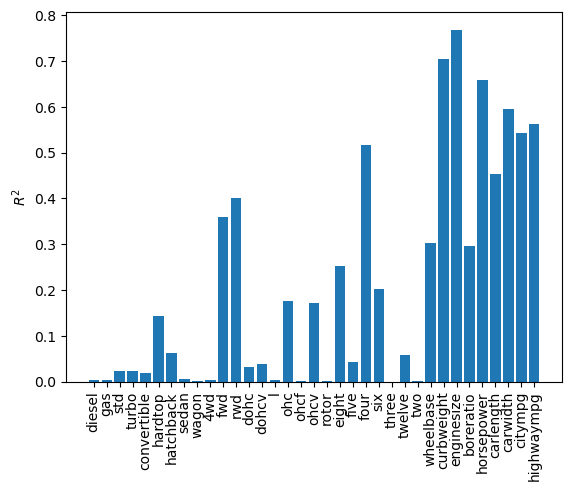

In [25]:
plt.bar(features,R_2)
plt.xticks(rotation=90)
plt.ylabel("$R^2$")
plt.show()

In [26]:
best=features[np.argmax(R_2)]
best

'enginesize'

So, 'enginesize' is the feature that produces the highest 
R2. We then train the feature that works best using all the data.

In [27]:
pipe.fit(X[[best]],y)

Pipeline(steps=[('ss', StandardScaler()), ('lr', LinearRegression())])

#### Exercise 2
In this Exercise, find the best feature using the test data, without standardization.

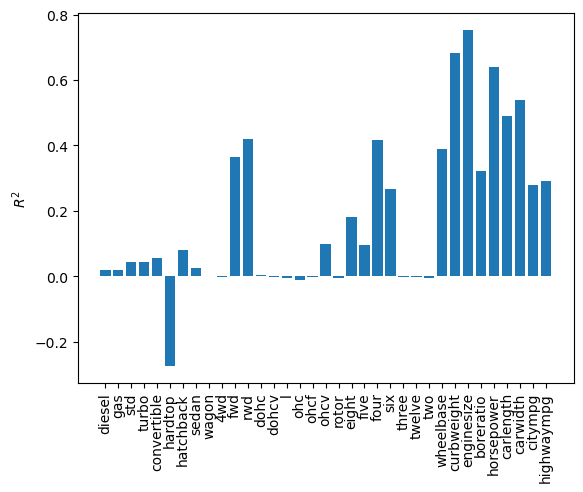

enginesize


In [28]:
R_2=[]

for feature in features:
      lr.fit(X_train[[feature]], y_train)
      R_2.append(lr.score(X_test[[feature]],y_test))
best=features[np.argmax(R_2)]
plt.bar(features,R_2)
plt.xticks(rotation=90)
plt.ylabel("$R^2$")
plt.show()
best=features[np.argmax(R_2)]
print(best)



#### K Fold Cross Validation
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=5 becoming 5-fold cross-validation, as shown in the Diagram below. In this case, we would use K-1 (or 4 folds) for testing a 1 fold for training. K-fold is also used for hyper-parameters selection that we will discuss later.

#### Cross Validation Score
Now, let's use Scikit-Learn's K-fold cross-validation method to see whether we can assess the performance of our model. The K-fold cross-validation method splits the training set into the number of folds (n_splits), as now in the Diagram above, if we have K folds, K-1 is used for training and one fold is used for testing. The input parameters are as follows:

estimatorestimator: The object to use to fit the data.

X: array-like of shape (n_samples, n_features). The data to fit. Can be for example a list, or an array.

y: array-like of shape (n_samples,) or (n_samples, n_outputs), default=None. The target variable to try to predict in the case of supervised learning.

scoring: A str or a scorer callable object/ function with signature scorer (estimator, X, y) which should return only a single value. See model evaluation documentation for more information.

In [29]:
N=len(X)
N

205

In [30]:
lr = LinearRegression()

Then, calculate cross validation scores based on our testing sets.

In [31]:
scores = cross_val_score(lr, X, y, scoring ="r2", cv=3)

scores 

array([ 0.81914915,  0.72660105, -0.10604748])

We can calculate mean and standard deviation using the following function of the scores:

In [32]:
def display_scores(scores, print_=False):
    
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [33]:
display_scores(scores)

Scores: [ 0.81914915  0.72660105 -0.10604748]
Mean: 0.47990090615679254
Standard deviation: 0.4160472090429716


The larger the fold, the better the model performance is, as we are using more samples for training; the variance also decreases.

Cross Validation Scores are RMSE values for training the data on each of our folds, in our case cv = 3, so we get 3 scores, 1 for each fold.

#### Exercise 3
In this Exercise, compute the cross validation scores for 5 folds, using the linear regression object lr and neg_mean_squared_error method for scoring.

In [34]:
scores = cross_val_score(lr, X ,y, scoring ="neg_mean_squared_error", cv=5)
lr_scores = np.sqrt(-scores)
display_scores(lr_scores)



Scores: [ 3155.3045326  11280.62969585  3075.74291214  5676.9873916
  5576.07425448]
Mean: 5752.947757336488
Standard deviation: 2983.5380987256613


#### K Fold
In many cases, we would like to train models that are not available in Scikit-learn or are too large to fit in the memory. We can create a KFold object that Provides train/test indices to split data into train/test sets in an iterative manner.

n_splitsint: A number of folds. Must be at least 2. Changed in version 0.22: n_splits default value changed from 3 to 5.

shuffle: Indicates whether to shuffle the data before splitting into batches. Note, the samples within each split will not be shuffled.

random_state: the random state.

We create the KFold object kf, setting the number of splits to 2.

In [35]:
n_splits=2
kf = KFold(n_splits = n_splits)

We train the model using the split(X,y) method. It provides the train/test indices for X and y. Half the data is used for training in the first iteration, and the rest is used for testing and displaying the indexes for each set. For the second iteration, the data used for training is used for testing, and the testing data is used for training. We store the R2 
 for each iteration in the array R_2. The np.zeros() function returns a new array of given shape and type, filled with zeros. Then, we calculate the 
R2 for each of the X_train and X_test splits.

In [36]:
y = data['price'].copy()
X = data.drop(columns=['price'])
R_2 = np.zeros((n_splits,1))
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])
n=0
for k,(train_index, test_index) in enumerate(kf.split(X,y)):
    print("TRAIN:", train_index)
    print("TEST:", test_index)
    X_train, X_test =X.iloc[train_index],X.iloc[test_index]
    
    y_train, y_test=y[train_index],y[test_index]
    pipe.fit(X_train,y_train)
    n=+1
    R_2[k]=pipe.score(X_test, y_test)

TRAIN: [103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203 204]
TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35


In [37]:
R_2.mean()

-4.530913120400596e+25

In [38]:
n_splits=3
kf = KFold(n_splits = n_splits)
y = data['price'].copy()
X = data.drop(columns=['price'])
R_2=np.zeros((n_splits,1))
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])
n=0
for k,(train_index, test_index) in enumerate(kf.split(X,y)):
    print("TRAIN:", train_index)
    print("TEST:", test_index)
    X_train, X_test =X.iloc[train_index],X.iloc[test_index]
    
    y_train, y_test=y[train_index],y[test_index]
    pipe.fit(X_train,y_train)
    n=+1
    R_2[k]=pipe.score(X_test, y_test)
    
    
R_2.mean()

TRAIN: [ 69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204]
TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  

-7.263194237621337e+25

#### Exercise 4
It many applications, it is useful to randomly select samples for K fold cross validation. In this Exercise, randomly select samples by setting shuffle to True in the KFold constructor. Use all the parameters, as above.



In [39]:
n_splits=3
kf = KFold(n_splits = n_splits,shuffle=True)
y = data['price'].copy()
X = data.drop(columns=['price'])
R_2=np.zeros((n_splits,1))
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])
n=0
for k,(train_index, test_index) in enumerate(kf.split(X,y)):
    print("TRAIN:", train_index)
    print("TEST:", test_index)
    X_train, X_test =X.iloc[train_index],X.iloc[test_index]


y_train, y_test=y[train_index],y[test_index]
pipe.fit(X_train,y_train)
n=+1
R_2[k]=pipe.score(X_test, y_test)

R_2.mean()



TRAIN: [  0   2   3   4   5   7  11  12  13  14  15  16  17  18  20  22  23  24
  27  29  32  33  34  36  38  39  40  43  44  45  46  49  50  52  53  54
  55  57  58  59  60  61  62  63  65  67  68  69  71  72  73  74  75  76
  78  79  80  81  83  84  85  86  90  94  96  97  98  99 100 101 104 105
 106 108 109 111 112 115 116 118 119 120 121 122 124 125 127 129 130 131
 136 137 140 141 142 143 144 145 147 148 149 152 153 155 156 157 158 159
 160 161 162 166 168 169 174 175 176 177 178 179 184 185 187 188 189 191
 192 194 197 198 199 200 201 202 203 204]
TEST: [  1   6   8   9  10  19  21  25  26  28  30  31  35  37  41  42  47  48
  51  56  64  66  70  77  82  87  88  89  91  92  93  95 102 103 107 110
 113 114 117 123 126 128 132 133 134 135 138 139 146 150 151 154 163 164
 165 167 170 171 172 173 180 181 182 183 186 190 193 195 196]
TRAIN: [  0   1   4   5   6   7   8   9  10  11  13  14  15  18  19  21  23  24
  25  26  28  30  31  32  33  34  35  37  40  41  42  47  48  49  50  51


-4.676194237177271e+25

In [40]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install py3-wget

In [43]:
pip install py3-wget

Note: you may need to restart the kernel to use updated packages.
